In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/reduced-ds2/reduced_dataset/validation/Erythema/image17547.jpg
/kaggle/input/reduced-ds2/reduced_dataset/validation/Erythema/image17546.jpg
/kaggle/input/reduced-ds2/reduced_dataset/validation/Erythema/image12853.jpg
/kaggle/input/reduced-ds2/reduced_dataset/validation/Erythema/image17948_180.jpg
/kaggle/input/reduced-ds2/reduced_dataset/validation/Erythema/image17937.jpg
/kaggle/input/reduced-ds2/reduced_dataset/validation/Erythema/image15048.jpg
/kaggle/input/reduced-ds2/reduced_dataset/validation/Erythema/image17996_180.jpg
/kaggle/input/reduced-ds2/reduced_dataset/validation/Erythema/image12959.jpg
/kaggle/input/reduced-ds2/reduced_dataset/validation/Erythema/image13039.jpg
/kaggle/input/reduced-ds2/reduced_dataset/validation/Erythema/image15238_270.jpg
/kaggle/input/reduced-ds2/reduced_dataset/validation/Erythema/image15302_90.jpg
/kaggle/input/reduced-ds2/reduced_dataset/validation/Erythema/image13251.jpg
/kaggle/input/reduced-ds2/reduced_dataset/validation/Erythema

In [2]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
import sys
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import *
from tensorflow.keras.models import *
from tensorflow.keras.preprocessing import image

In [3]:
train_data_dir = '/kaggle/input/reduced-ds2/reduced_dataset/training'  # Directory with 10 class subfolders for training
validation_data_dir = '/kaggle/input//reduced-ds2/reduced_dataset/validation'  # Directory with 10 class subfolders for validation
#test_data_dir

In [4]:
#  import os
#  print(os.listdir('/kaggle/input/reduced_dataset/training'))  # To check available folders
#  print(os.listdir('/kaggle/input/'))  # Drill down to verify folders

In [5]:
image_size = (224, 224)  # Example image size, adjust to your requirement
batch_size = 32
num_classes = 10

In [6]:
# Data generator for training data (no validation split here)
train_datagen = ImageDataGenerator(rescale=1./255)

In [7]:
# Training generator
train_generator = train_datagen.flow_from_directory(
    train_data_dir,  # Path to the training data directory
    target_size=image_size,  # Ensure this matches your model's input size
    batch_size=batch_size,
    class_mode='categorical',  # Changed to 'categorical' for one-hot encoding
    shuffle=True  # Shuffle training data
)

Found 8000 images belonging to 10 classes.


In [8]:
# test_generator = train_datagen.flow_from_directory(
#     train_data_dir,
#     target_size=image_size,
#     batch_size=batch_size,
#     class_mode='sparse',
#     subset='validation') 

In [9]:
# Data generator for validation data
validation_datagen = ImageDataGenerator(rescale=1./255)

In [10]:
# Validation generator (using validation_data_dir)
validation_generator = validation_datagen.flow_from_directory(
    validation_data_dir,  # Path to the validation data directory
    target_size=image_size,  # Ensure this matches your model's input size
    batch_size=batch_size,
    class_mode='categorical',  # Changed to 'categorical' for one-hot encoding
    shuffle=False  # Don't shuffle validation data
)

Found 2032 images belonging to 10 classes.


In [11]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(224, 224, 3)),  # Input layer with shape 224x224x3
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.AveragePooling2D(2, 2),  # Use Average Pooling instead of Max Pooling
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.AveragePooling2D(2, 2),  # Use Average Pooling
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(num_classes, activation='softmax')  # Output layer for 10 classes
])

In [12]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',  # Changed to CategoricalCrossentropy
              metrics=['accuracy', 'Precision', 'Recall', 'AUC'])  # Keep metrics the same

In [13]:
history = model.fit(
    train_generator,
    epochs=25,
    validation_data=validation_generator)

Epoch 1/25


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
I0000 00:00:1729691190.085591     114 service.cc:145] XLA service 0x7efbac00af20 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1729691190.085648     114 service.cc:153]   StreamExecutor device (0): Tesla P100-PCIE-16GB, Compute Capability 6.0


  1/250 ━━━━━━━━━━━━━━━━━━━━ 37:23 9s/step - AUC: 0.5301 - Precision: 0.0000e+00 - Recall: 0.0000e+00 - accuracy: 0.1250 - loss: 2.2991

I0000 00:00:1729691195.148830     114 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


250/250 ━━━━━━━━━━━━━━━━━━━━ 78s 278ms/step - AUC: 0.7503 - Precision: 0.5698 - Recall: 0.1266 - accuracy: 0.3366 - loss: 2.5103 - val_AUC: 0.7515 - val_Precision: 0.5044 - val_Recall: 0.1969 - val_accuracy: 0.2948 - val_loss: 2.2577
Epoch 2/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 22s 85ms/step - AUC: 0.9301 - Precision: 0.8225 - Recall: 0.4158 - accuracy: 0.6044 - loss: 1.1047 - val_AUC: 0.7452 - val_Precision: 0.4811 - val_Recall: 0.2318 - val_accuracy: 0.3066 - val_loss: 2.4903
Epoch 3/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 22s 87ms/step - AUC: 0.9688 - Precision: 0.8852 - Recall: 0.6153 - accuracy: 0.7358 - loss: 0.7451 - val_AUC: 0.7062 - val_Precision: 0.3478 - val_Recall: 0.2441 - val_accuracy: 0.2810 - val_loss: 3.8277
Epoch 4/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 21s 83ms/step - AUC: 0.9862 - Precision: 0.9087 - Recall: 0.7555 - accuracy: 0.8387 - loss: 0.4964 - val_AUC: 0.6916 - val_Precision: 0.3079 - val_Recall: 0.2579 - val_accuracy: 0.2776 - val_loss: 4.6887
Epoch 5/25
250/250 ━━━━━━━━━━━━━━━

In [14]:
model.evaluate(train_generator)

250/250 ━━━━━━━━━━━━━━━━━━━━ 17s 67ms/step - AUC: 0.9995 - Precision: 0.9913 - Recall: 0.9912 - accuracy: 0.9913 - loss: 0.0294


[0.02970079332590103,
 0.9909999966621399,
 0.9909988641738892,
 0.9908750057220459,
 0.9996702671051025]

In [15]:
model.evaluate(validation_generator)

64/64 ━━━━━━━━━━━━━━━━━━━━ 5s 70ms/step - AUC: 0.6268 - Precision: 0.2182 - Recall: 0.1978 - accuracy: 0.2110 - loss: 6.5052


[6.912517070770264,
 0.312992125749588,
 0.3248272240161896,
 0.3006889820098877,
 0.6801103949546814]

In [17]:
# model.evaluate(test_generator)

In [18]:
def plot_training(hist):
    tr_acc = hist.history['accuracy']
    tr_loss = hist.history['loss']
    val_acc = hist.history['val_accuracy']
    val_loss = hist.history['val_loss']
    val_precision = hist.history['val_Precision']  # Thêm lịch sử precision
    val_recall = hist.history['val_Recall']        # Thêm lịch sử recall
    val_auc = hist.history['val_AUC']              # Thêm lịch sử AUC

    index_loss = np.argmin(val_loss)
    val_lowest = val_loss[index_loss]
    index_acc = np.argmax(val_acc)
    acc_highest = val_acc[index_acc]
    index_precision = np.argmax(val_precision)     
    precision_highest = val_precision[index_precision] 
    index_recall = np.argmax(val_recall)           
    recall_highest = val_recall[index_recall]     
    index_auc = np.argmax(val_auc)                 
    auc_highest = val_auc[index_auc]              

    plt.figure(figsize=(20, 12))
    plt.style.use('fivethirtyeight')
    Epochs = range(1, len(tr_acc) + 1)

    plt.subplot(2, 2, 1)
    plt.plot(Epochs, tr_loss, 'r', label='Training Loss')
    plt.plot(Epochs, val_loss, 'g', label='Validation Loss')
    plt.scatter(index_loss + 1, val_lowest, s=150, c='blue', label=f'Best Loss: {index_loss + 1} ({val_lowest:.4f})')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.subplot(2, 2, 2)
    plt.plot(Epochs, tr_acc, 'r', label='Training Accuracy')
    plt.plot(Epochs, val_acc, 'g', label='Validation Accuracy')
    plt.scatter(index_acc + 1, acc_highest, s=150, c='blue', label=f'Best Accuracy: {index_acc + 1} ({acc_highest:.4f})')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(2, 2, 3)
    plt.plot(Epochs, val_precision, 'b', label='Validation Precision')
    plt.scatter(index_precision + 1, precision_highest, s=150, c='blue', label=f'Best Precision: {index_precision + 1} ({precision_highest:.4f})')
    plt.title('Validation Precision')
    plt.xlabel('Epochs')
    plt.ylabel('Precision')
    plt.legend()

    plt.subplot(2, 2, 4)
    plt.plot(Epochs, val_recall, 'm', label='Validation Recall')
    plt.scatter(index_recall + 1, recall_highest, s=150, c='blue', label=f'Best Recall: {index_recall + 1} ({recall_highest:.4f})')
    plt.title('Validation Recall')
    plt.xlabel('Epochs')
    plt.ylabel('Recall')
    plt.legend()

    plt.tight_layout()
    plt.show()

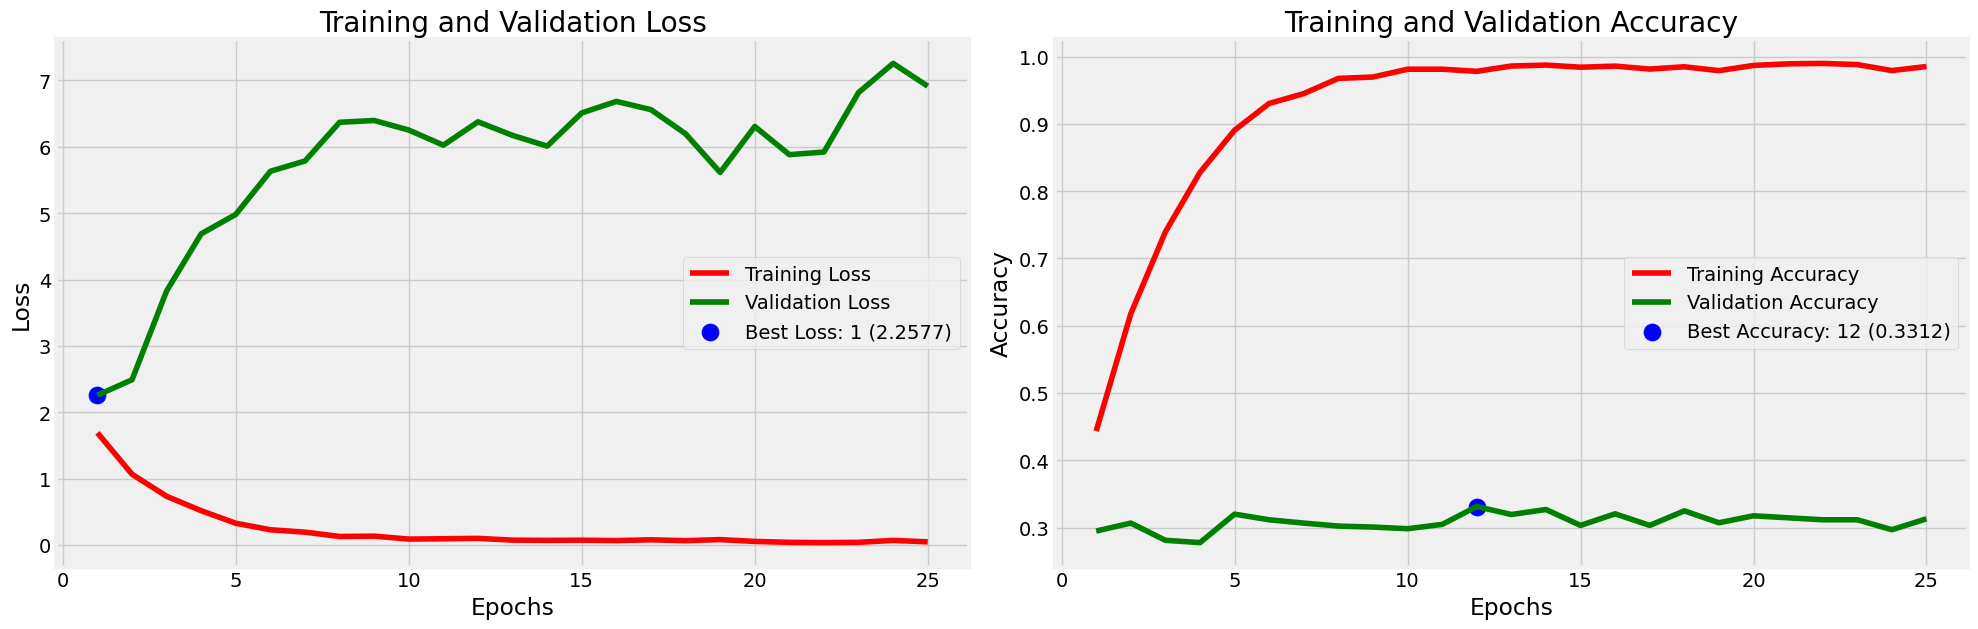

In [19]:
import numpy as np
import matplotlib.pyplot as plt

def plot_training(hist):
    # Extract available metrics
    tr_acc = hist.history['accuracy']
    tr_loss = hist.history['loss']
    val_acc = hist.history.get('val_accuracy')
    val_loss = hist.history.get('val_loss')
    val_precision = hist.history.get('val_precision')
    val_recall = hist.history.get('val_recall')
    val_auc = hist.history.get('val_auc')

    # Identify best epochs for various metrics
    index_loss = np.argmin(val_loss)
    val_lowest = val_loss[index_loss]
    index_acc = np.argmax(val_acc)
    acc_highest = val_acc[index_acc]
    
    if val_precision:
        index_precision = np.argmax(val_precision)
        precision_highest = val_precision[index_precision]
        
    if val_recall:
        index_recall = np.argmax(val_recall)
        recall_highest = val_recall[index_recall]

    if val_auc:
        index_auc = np.argmax(val_auc)
        auc_highest = val_auc[index_auc]

    plt.figure(figsize=(20, 12))
    plt.style.use('fivethirtyeight')
    Epochs = range(1, len(tr_acc) + 1)

    # Plot Loss
    plt.subplot(2, 2, 1)
    plt.plot(Epochs, tr_loss, 'r', label='Training Loss')
    plt.plot(Epochs, val_loss, 'g', label='Validation Loss')
    plt.scatter(index_loss + 1, val_lowest, s=150, c='blue', label=f'Best Loss: {index_loss + 1} ({val_lowest:.4f})')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    # Plot Accuracy
    plt.subplot(2, 2, 2)
    plt.plot(Epochs, tr_acc, 'r', label='Training Accuracy')
    plt.plot(Epochs, val_acc, 'g', label='Validation Accuracy')
    plt.scatter(index_acc + 1, acc_highest, s=150, c='blue', label=f'Best Accuracy: {index_acc + 1} ({acc_highest:.4f})')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    # Plot Precision if available
    if val_precision:
        plt.subplot(2, 2, 3)
        plt.plot(Epochs, val_precision, 'b', label='Validation Precision')
        plt.scatter(index_precision + 1, precision_highest, s=150, c='blue', label=f'Best Precision: {index_precision + 1} ({precision_highest:.4f})')
        plt.title('Validation Precision')
        plt.xlabel('Epochs')
        plt.ylabel('Precision')
        plt.legend()

    # Plot Recall if available
    if val_recall:
        plt.subplot(2, 2, 4)
        plt.plot(Epochs, val_recall, 'm', label='Validation Recall')
        plt.scatter(index_recall + 1, recall_highest, s=150, c='blue', label=f'Best Recall: {index_recall + 1} ({recall_highest:.4f})')
        plt.title('Validation Recall')
        plt.xlabel('Epochs')
        plt.ylabel('Recall')
        plt.legend()

    plt.tight_layout()
    plt.show()

# Plot results after model training
plot_training(history)

64/64 ━━━━━━━━━━━━━━━━━━━━ 5s 69ms/step


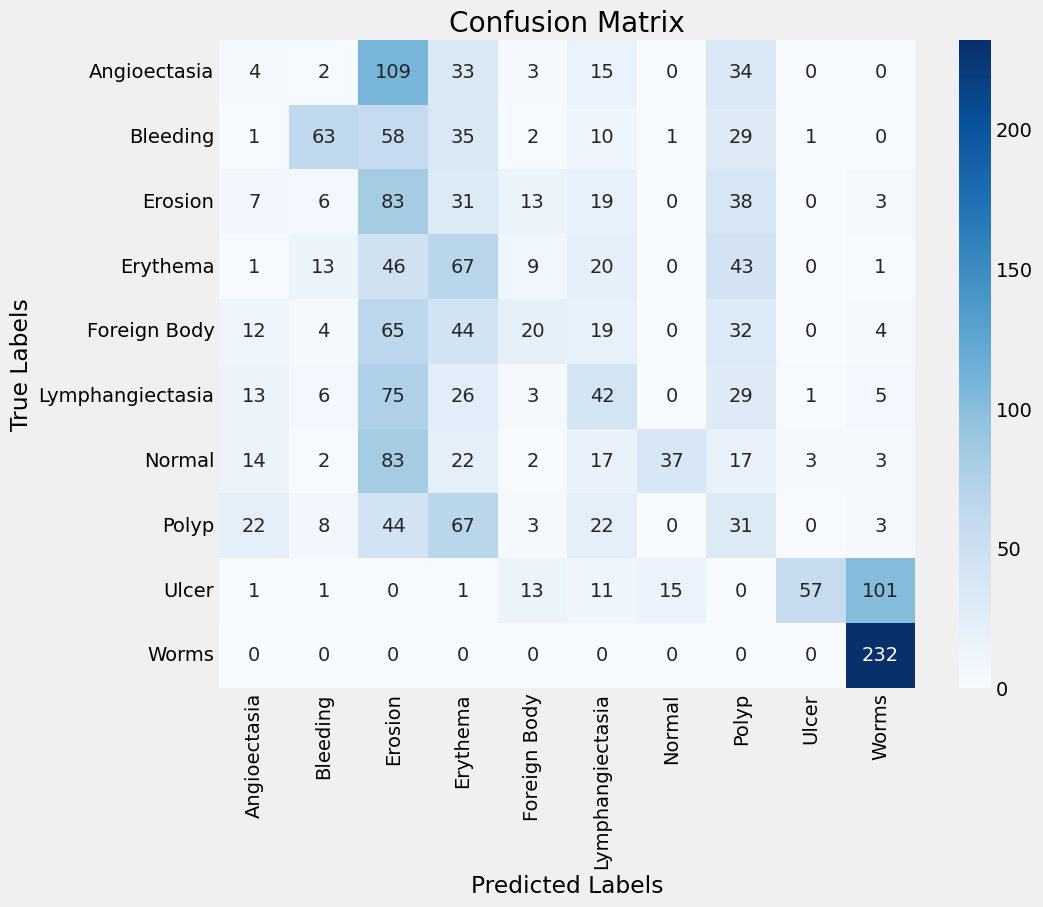

In [20]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Get predictions from the validation set
Y_pred = model.predict(validation_generator, verbose=1)
Y_pred = np.argmax(Y_pred, axis=1)

# Get actual labels from the validation set
Y_val = validation_generator.classes

# Compute confusion matrix
cm = confusion_matrix(Y_val, Y_pred)

# Set up the labels for the 10 classes (or adjust based on actual class names)
class_labels = list(validation_generator.class_indices.keys())  # Use actual class names if available

# Display the confusion matrix as a heatmap
plt.figure(figsize=(10, 8))  # Adjust size for better visibility
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 378ms/step
Prediction probabilities: [[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]]


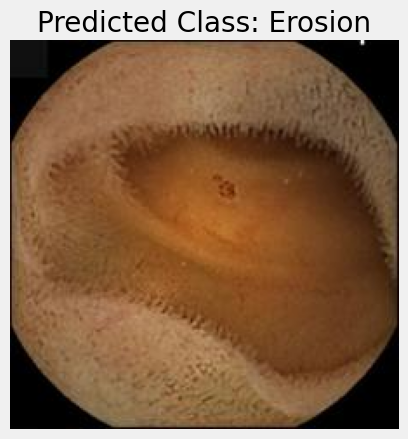

THE UPLOADED IMAGE SEEMS TO BE: Erosion


In [21]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model
import numpy as np
import matplotlib.pyplot as plt


# Load the image and preprocess it
img_path = '/kaggle/input/reduced-ds2/reduced_dataset/validation/Angioectasia/image10254.jpg'
img = image.load_img(img_path, target_size=(224, 224))

# Convert image to array and expand dimensions
imag = image.img_to_array(img)
imaga = np.expand_dims(imag, axis=0)

# Make a prediction
ypred = model.predict(imaga)
print("Prediction probabilities:", ypred)

# Get the index of the highest probability class
a = np.argmax(ypred, axis=-1)

# Define the class labels
class_labels = {
    0: 'Angioectasia',
    1: 'Bleeding',
    2: 'Erosion',
    3: 'Erythema',
    4: 'Foreign Body',
    5: 'Lymphangiectasia',
    6: 'Normal',
    7: 'Polyp',
    8: 'Ulcer',
    9: 'Worms'
}

# Get the corresponding class name for the predicted index
op = class_labels.get(a[0], "Unknown")  # a[0] to get the actual integer value from the array

# Display the image and the prediction
plt.imshow(img)
plt.axis('off')  # Turn off axis
plt.title(f"Predicted Class: {op}")  # Display the predicted class in the title
plt.show()  # Show the plot

print("THE UPLOADED IMAGE SEEMS TO BE:", op)
# #/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
#   self._warn_if_super_not_called()
# WARNING: All log messages before absl::InitializeLog() is called are written to STDERR
# I0000 00:00:1729583867.362974     167 service.cc:145] XLA service 0x7a54a4005b90 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
# I0000 00:00:1729583867.363021     167 service.cc:153]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
# I0000 00:00:1729583867.363025     167 service.cc:153]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5
#train test 70:30
#224x224 lena hai
#

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Prediction probabilities: [[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]


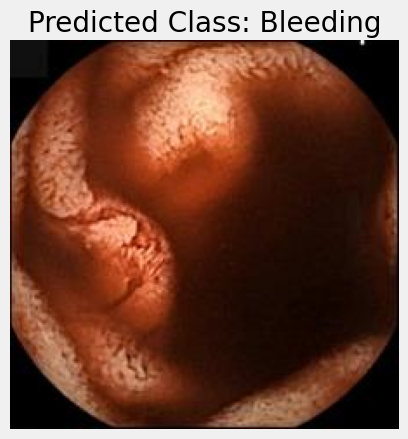

THE UPLOADED IMAGE SEEMS TO BE: Bleeding


In [22]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model
import numpy as np
import matplotlib.pyplot as plt


# Load the image and preprocess it
img_path = '/kaggle/input/reduced-ds2/reduced_dataset/validation/Bleeding/image13498.jpg'
img = image.load_img(img_path, target_size=(224, 224))

# Convert image to array and expand dimensions
imag = image.img_to_array(img)
imaga = np.expand_dims(imag, axis=0)

# Make a prediction
ypred = model.predict(imaga)
print("Prediction probabilities:", ypred)

# Get the index of the highest probability class
a = np.argmax(ypred, axis=-1)

# Define the class labels
class_labels = {
    0: 'Angioectasia',
    1: 'Bleeding',
    2: 'Erosion',
    3: 'Erythema',
    4: 'Foreign Body',
    5: 'Lymphangiectasia',
    6: 'Normal',
    7: 'Polyp',
    8: 'Ulcer',
    9: 'Worms'
}

# Get the corresponding class name for the predicted index
op = class_labels.get(a[0], "Unknown")  # a[0] to get the actual integer value from the array

# Display the image and the prediction
plt.imshow(img)
plt.axis('off')  # Turn off axis
plt.title(f"Predicted Class: {op}")  # Display the predicted class in the title
plt.show()  # Show the plot

print("THE UPLOADED IMAGE SEEMS TO BE:", op)
# #/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
#   self._warn_if_super_not_called()
# WARNING: All log messages before absl::InitializeLog() is called are written to STDERR
# I0000 00:00:1729583867.362974     167 service.cc:145] XLA service 0x7a54a4005b90 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
# I0000 00:00:1729583867.363021     167 service.cc:153]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
# I0000 00:00:1729583867.363025     167 service.cc:153]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5
#train test 70:30
#224x224 lena hai
#

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Prediction probabilities: [[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]


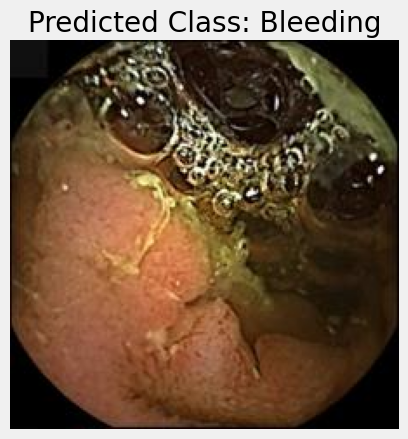

THE UPLOADED IMAGE SEEMS TO BE: Bleeding


In [23]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model
import numpy as np
import matplotlib.pyplot as plt


# Load the image and preprocess it
img_path = '/kaggle/input/reduced-ds2/reduced_dataset/validation/Erosion/image13769.jpg'
img = image.load_img(img_path, target_size=(224, 224))

# Convert image to array and expand dimensions
imag = image.img_to_array(img)
imaga = np.expand_dims(imag, axis=0)

# Make a prediction
ypred = model.predict(imaga)
print("Prediction probabilities:", ypred)

# Get the index of the highest probability class
a = np.argmax(ypred, axis=-1)

# Define the class labels
class_labels = {
    0: 'Angioectasia',
    1: 'Bleeding',
    2: 'Erosion',
    3: 'Erythema',
    4: 'Foreign Body',
    5: 'Lymphangiectasia',
    6: 'Normal',
    7: 'Polyp',
    8: 'Ulcer',
    9: 'Worms'
}

# Get the corresponding class name for the predicted index
op = class_labels.get(a[0], "Unknown")  # a[0] to get the actual integer value from the array

# Display the image and the prediction
plt.imshow(img)
plt.axis('off')  # Turn off axis
plt.title(f"Predicted Class: {op}")  # Display the predicted class in the title
plt.show()  # Show the plot

print("THE UPLOADED IMAGE SEEMS TO BE:", op)
# #/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
#   self._warn_if_super_not_called()
# WARNING: All log messages before absl::InitializeLog() is called are written to STDERR
# I0000 00:00:1729583867.362974     167 service.cc:145] XLA service 0x7a54a4005b90 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
# I0000 00:00:1729583867.363021     167 service.cc:153]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
# I0000 00:00:1729583867.363025     167 service.cc:153]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5
#train test 70:30
#224x224 lena hai
#

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Prediction probabilities: [[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]]


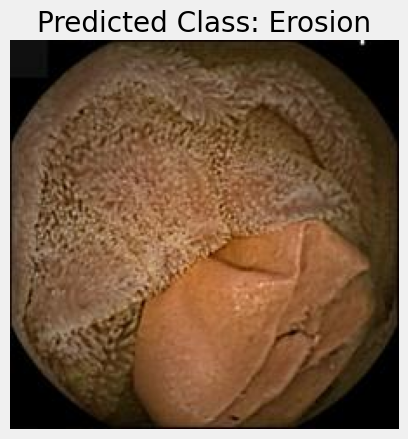

THE UPLOADED IMAGE SEEMS TO BE: Erosion


In [24]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model
import numpy as np
import matplotlib.pyplot as plt


# Load the image and preprocess it
img_path = '/kaggle/input/reduced-ds2/reduced_dataset/validation/Foreign Body/image02756.jpg'
img = image.load_img(img_path, target_size=(224, 224))

# Convert image to array and expand dimensions
imag = image.img_to_array(img)
imaga = np.expand_dims(imag, axis=0)

# Make a prediction
ypred = model.predict(imaga)
print("Prediction probabilities:", ypred)

# Get the index of the highest probability class
a = np.argmax(ypred, axis=-1)

# Define the class labels
class_labels = {
    0: 'Angioectasia',
    1: 'Bleeding',
    2: 'Erosion',
    3: 'Erythema',
    4: 'Foreign Body',
    5: 'Lymphangiectasia',
    6: 'Normal',
    7: 'Polyp',
    8: 'Ulcer',
    9: 'Worms'
}

# Get the corresponding class name for the predicted index
op = class_labels.get(a[0], "Unknown")  # a[0] to get the actual integer value from the array

# Display the image and the prediction
plt.imshow(img)
plt.axis('off')  # Turn off axis
plt.title(f"Predicted Class: {op}")  # Display the predicted class in the title
plt.show()  # Show the plot

print("THE UPLOADED IMAGE SEEMS TO BE:", op)
# #/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
#   self._warn_if_super_not_called()
# WARNING: All log messages before absl::InitializeLog() is called are written to STDERR
# I0000 00:00:1729583867.362974     167 service.cc:145] XLA service 0x7a54a4005b90 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
# I0000 00:00:1729583867.363021     167 service.cc:153]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
# I0000 00:00:1729583867.363025     167 service.cc:153]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5
#train test 70:30
#224x224 lena hai
#

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Prediction probabilities: [[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


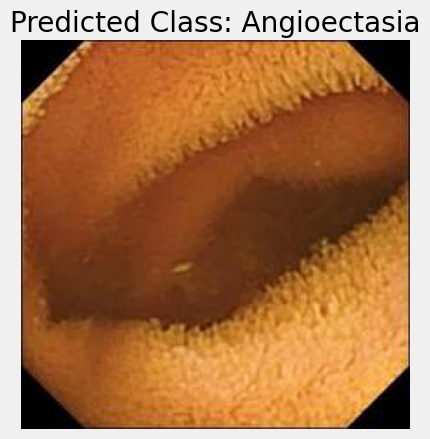

THE UPLOADED IMAGE SEEMS TO BE: Angioectasia


In [25]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model
import numpy as np
import matplotlib.pyplot as plt


# Load the image and preprocess it
img_path = '/kaggle/input/reduced-ds2/reduced_dataset/validation/Normal/fb86bc87d3874cd7_10685.jpg'
img = image.load_img(img_path, target_size=(224, 224))

# Convert image to array and expand dimensions
imag = image.img_to_array(img)
imaga = np.expand_dims(imag, axis=0)

# Make a prediction
ypred = model.predict(imaga)
print("Prediction probabilities:", ypred)

# Get the index of the highest probability class
a = np.argmax(ypred, axis=-1)

# Define the class labels
class_labels = {
    0: 'Angioectasia',
    1: 'Bleeding',
    2: 'Erosion',
    3: 'Erythema',
    4: 'Foreign Body',
    5: 'Lymphangiectasia',
    6: 'Normal',
    7: 'Polyp',
    8: 'Ulcer',
    9: 'Worms'
}

# Get the corresponding class name for the predicted index
op = class_labels.get(a[0], "Unknown")  # a[0] to get the actual integer value from the array

# Display the image and the prediction
plt.imshow(img)
plt.axis('off')  # Turn off axis
plt.title(f"Predicted Class: {op}")  # Display the predicted class in the title
plt.show()  # Show the plot

print("THE UPLOADED IMAGE SEEMS TO BE:", op)
# #/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
#   self._warn_if_super_not_called()
# WARNING: All log messages before absl::InitializeLog() is called are written to STDERR
# I0000 00:00:1729583867.362974     167 service.cc:145] XLA service 0x7a54a4005b90 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
# I0000 00:00:1729583867.363021     167 service.cc:153]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
# I0000 00:00:1729583867.363025     167 service.cc:153]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5
#train test 70:30
#224x224 lena hai
#

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Prediction probabilities: [[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]]


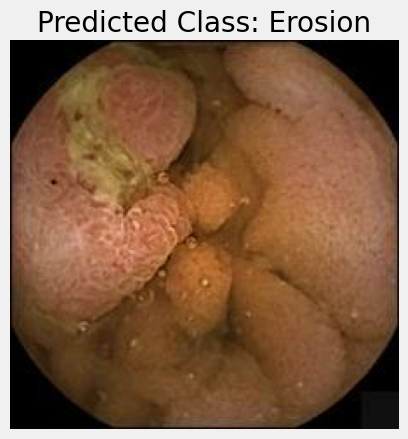

THE UPLOADED IMAGE SEEMS TO BE: Erosion


In [26]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model
import numpy as np
import matplotlib.pyplot as plt


# Load the image and preprocess it
img_path = '/kaggle/input/reduced-ds2/reduced_dataset/validation/Erythema/image12779_180.jpg'
img = image.load_img(img_path, target_size=(224, 224))

# Convert image to array and expand dimensions
imag = image.img_to_array(img)
imaga = np.expand_dims(imag, axis=0)

# Make a prediction
ypred = model.predict(imaga)
print("Prediction probabilities:", ypred)

# Get the index of the highest probability class
a = np.argmax(ypred, axis=-1)

# Define the class labels
class_labels = {
    0: 'Angioectasia',
    1: 'Bleeding',
    2: 'Erosion',
    3: 'Erythema',
    4: 'Foreign Body',
    5: 'Lymphangiectasia',
    6: 'Normal',
    7: 'Polyp',
    8: 'Ulcer',
    9: 'Worms'
}

# Get the corresponding class name for the predicted index
op = class_labels.get(a[0], "Unknown")  # a[0] to get the actual integer value from the array

# Display the image and the prediction
plt.imshow(img)
plt.axis('off')  # Turn off axis
plt.title(f"Predicted Class: {op}")  # Display the predicted class in the title
plt.show()  # Show the plot

print("THE UPLOADED IMAGE SEEMS TO BE:", op)
# #/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
#   self._warn_if_super_not_called()
# WARNING: All log messages before absl::InitializeLog() is called are written to STDERR
# I0000 00:00:1729583867.362974     167 service.cc:145] XLA service 0x7a54a4005b90 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
# I0000 00:00:1729583867.363021     167 service.cc:153]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
# I0000 00:00:1729583867.363025     167 service.cc:153]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5
#train test 70:30
#224x224 lena hai
#

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Prediction probabilities: [[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]]


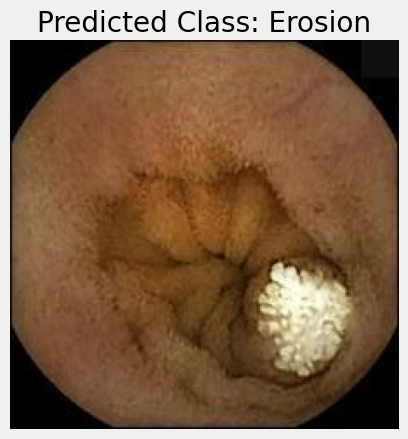

THE UPLOADED IMAGE SEEMS TO BE: Erosion


In [27]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model
import numpy as np
import matplotlib.pyplot as plt


# Load the image and preprocess it
img_path = '/kaggle/input/reduced-ds2/reduced_dataset/validation/Lymphangiectasia/image08007_270.jpg'
img = image.load_img(img_path, target_size=(224, 224))

# Convert image to array and expand dimensions
imag = image.img_to_array(img)
imaga = np.expand_dims(imag, axis=0)

# Make a prediction
ypred = model.predict(imaga)
print("Prediction probabilities:", ypred)

# Get the index of the highest probability class
a = np.argmax(ypred, axis=-1)

# Define the class labels
class_labels = {
    0: 'Angioectasia',
    1: 'Bleeding',
    2: 'Erosion',
    3: 'Erythema',
    4: 'Foreign Body',
    5: 'Lymphangiectasia',
    6: 'Normal',
    7: 'Polyp',
    8: 'Ulcer',
    9: 'Worms'
}

# Get the corresponding class name for the predicted index
op = class_labels.get(a[0], "Unknown")  # a[0] to get the actual integer value from the array

# Display the image and the prediction
plt.imshow(img)
plt.axis('off')  # Turn off axis
plt.title(f"Predicted Class: {op}")  # Display the predicted class in the title
plt.show()  # Show the plot

print("THE UPLOADED IMAGE SEEMS TO BE:", op)
# #/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
#   self._warn_if_super_not_called()
# WARNING: All log messages before absl::InitializeLog() is called are written to STDERR
# I0000 00:00:1729583867.362974     167 service.cc:145] XLA service 0x7a54a4005b90 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
# I0000 00:00:1729583867.363021     167 service.cc:153]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
# I0000 00:00:1729583867.363025     167 service.cc:153]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5
#train test 70:30
#224x224 lena hai
#

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Prediction probabilities: [[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]


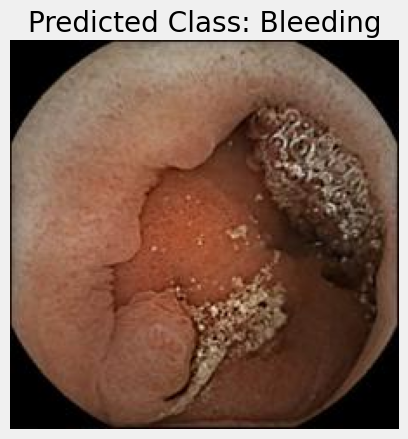

THE UPLOADED IMAGE SEEMS TO BE: Bleeding


In [28]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model
import numpy as np
import matplotlib.pyplot as plt


# Load the image and preprocess it
img_path = '/kaggle/input/reduced-ds2/reduced_dataset/validation/Polyp/image17398.jpg'
img = image.load_img(img_path, target_size=(224, 224))

# Convert image to array and expand dimensions
imag = image.img_to_array(img)
imaga = np.expand_dims(imag, axis=0)

# Make a prediction
ypred = model.predict(imaga)
print("Prediction probabilities:", ypred)

# Get the index of the highest probability class
a = np.argmax(ypred, axis=-1)

# Define the class labels
class_labels = {
    0: 'Angioectasia',
    1: 'Bleeding',
    2: 'Erosion',
    3: 'Erythema',
    4: 'Foreign Body',
    5: 'Lymphangiectasia',
    6: 'Normal',
    7: 'Polyp',
    8: 'Ulcer',
    9: 'Worms'
}

# Get the corresponding class name for the predicted index
op = class_labels.get(a[0], "Unknown")  # a[0] to get the actual integer value from the array

# Display the image and the prediction
plt.imshow(img)
plt.axis('off')  # Turn off axis
plt.title(f"Predicted Class: {op}")  # Display the predicted class in the title
plt.show()  # Show the plot

print("THE UPLOADED IMAGE SEEMS TO BE:", op)
# #/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
#   self._warn_if_super_not_called()
# WARNING: All log messages before absl::InitializeLog() is called are written to STDERR
# I0000 00:00:1729583867.362974     167 service.cc:145] XLA service 0x7a54a4005b90 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
# I0000 00:00:1729583867.363021     167 service.cc:153]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
# I0000 00:00:1729583867.363025     167 service.cc:153]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5
#train test 70:30
#224x224 lena hai
#

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Prediction probabilities: [[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]]


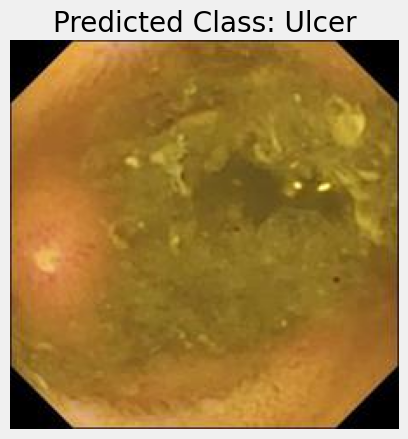

THE UPLOADED IMAGE SEEMS TO BE: Ulcer


In [29]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model
import numpy as np
import matplotlib.pyplot as plt


# Load the image and preprocess it
img_path = '/kaggle/input/reduced-ds2/reduced_dataset/validation/Ulcer/d626f4f4a5ac4785_51443.jpg'
img = image.load_img(img_path, target_size=(224, 224))

# Convert image to array and expand dimensions
imag = image.img_to_array(img)
imaga = np.expand_dims(imag, axis=0)

# Make a prediction
ypred = model.predict(imaga)
print("Prediction probabilities:", ypred)

# Get the index of the highest probability class
a = np.argmax(ypred, axis=-1)

# Define the class labels
class_labels = {
    0: 'Angioectasia',
    1: 'Bleeding',
    2: 'Erosion',
    3: 'Erythema',
    4: 'Foreign Body',
    5: 'Lymphangiectasia',
    6: 'Normal',
    7: 'Polyp',
    8: 'Ulcer',
    9: 'Worms'
}

# Get the corresponding class name for the predicted index
op = class_labels.get(a[0], "Unknown")  # a[0] to get the actual integer value from the array

# Display the image and the prediction
plt.imshow(img)
plt.axis('off')  # Turn off axis
plt.title(f"Predicted Class: {op}")  # Display the predicted class in the title
plt.show()  # Show the plot

print("THE UPLOADED IMAGE SEEMS TO BE:", op)
# #/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
#   self._warn_if_super_not_called()
# WARNING: All log messages before absl::InitializeLog() is called are written to STDERR
# I0000 00:00:1729583867.362974     167 service.cc:145] XLA service 0x7a54a4005b90 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
# I0000 00:00:1729583867.363021     167 service.cc:153]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
# I0000 00:00:1729583867.363025     167 service.cc:153]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5
#train test 70:30
#224x224 lena hai
#

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Prediction probabilities: [[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


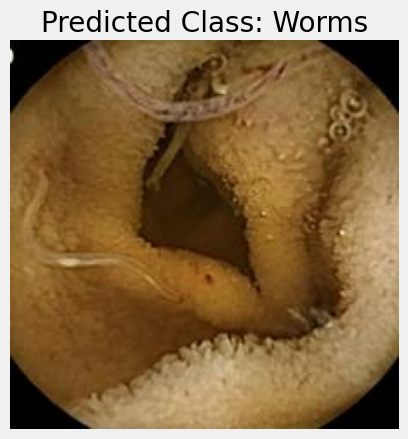

THE UPLOADED IMAGE SEEMS TO BE: Worms


In [30]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model
import numpy as np
import matplotlib.pyplot as plt


# Load the image and preprocess it
img_path = '/kaggle/input/reduced-ds2/reduced_dataset/validation/Worms/worm1_1047.jpg'
img = image.load_img(img_path, target_size=(224, 224))

# Convert image to array and expand dimensions
imag = image.img_to_array(img)
imaga = np.expand_dims(imag, axis=0)

# Make a prediction
ypred = model.predict(imaga)
print("Prediction probabilities:", ypred)

# Get the index of the highest probability class
a = np.argmax(ypred, axis=-1)

# Define the class labels
class_labels = {
    0: 'Angioectasia',
    1: 'Bleeding',
    2: 'Erosion',
    3: 'Erythema',
    4: 'Foreign Body',
    5: 'Lymphangiectasia',
    6: 'Normal',
    7: 'Polyp',
    8: 'Ulcer',
    9: 'Worms'
}

# Get the corresponding class name for the predicted index
op = class_labels.get(a[0], "Unknown")  # a[0] to get the actual integer value from the array

# Display the image and the prediction
plt.imshow(img)
plt.axis('off')  # Turn off axis
plt.title(f"Predicted Class: {op}")  # Display the predicted class in the title
plt.show()  # Show the plot

print("THE UPLOADED IMAGE SEEMS TO BE:", op)
# #/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
#   self._warn_if_super_not_called()
# WARNING: All log messages before absl::InitializeLog() is called are written to STDERR
# I0000 00:00:1729583867.362974     167 service.cc:145] XLA service 0x7a54a4005b90 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
# I0000 00:00:1729583867.363021     167 service.cc:153]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
# I0000 00:00:1729583867.363025     167 service.cc:153]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5
#train test 70:30
#224x224 lena hai
#